In [0]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df1=pd.read_csv("train.csv")
print(df1.shape)
df1.head()

(3235, 6)


,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1


In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3235 non-null   float64
 1   original_text    3235 non-null   object 
 2   lang             3231 non-null   object 
 3   retweet_count    3231 non-null   object 
 4   original_author  3235 non-null   object 
 5   sentiment_class  3235 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 151.8+ KB


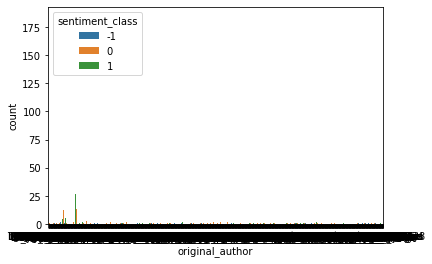

In [0]:
sns.countplot(x='original_author', hue="sentiment_class", data = df1)

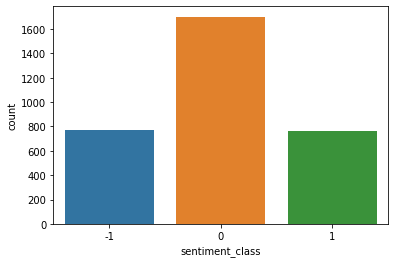

In [0]:
sns.countplot( x="sentiment_class", data = df1)

In [0]:
print(df1.lang.nunique())
df1.lang.unique()

232


array(['en', '-0.0138325017', '-0.9677309496', '-0.3876905537',
       '0.5309553602', '-0.045423609', '0.1210638815', '&gt',
       ' have them delivered!', '-0.7860764746',
       ' very much loved\U0001f970️ …', '0.7885519508', '0.4310598662',
       '0.6034925894', '0.8837056921', '-0.4757848717', '0.1262837865',
       '0.8296402421', '0.2203775303', '-0.0320226838', '-0.0272467108',
       '-0.9022044897', 'I was ten weeks...', '0.4754834129', ' ️',
       '0.7120802873', '0.7493660991', '0.3716244571', '0.4616286043',
       '0.4479350131', ' PROSPERITY KING ZAY I MET YOU WHEN YOU WAS &amp',
       '0.6747864639', '-0.7798220898', '-0.6668237899', '-0.948781497',
       '-0.4189029043', '0.001710524', '0.0903948317', '-0.6936114103',
       '0.3087589587', " here's to !", '-0.7182082972', '0.195401415',
       '-0.0064143617', ' pink Peruvian opal! via', '0.8077853046',
       '0.5129957209', '-0.1651444775', '0.4611910293',
       ' look really confused 🤷\u200d️ i realize I’m A

In [0]:
print(df1.original_author.nunique())
df1.original_author.unique()

1574


array(['BeenXXPired', 'FestiveFeeling', 'KrisAllenSak', ..., 'lupoista',
       'FaeryLover', 'localcreativity'], dtype=object)

In [0]:
df1.isnull().sum()


id                 0
original_text      0
lang               4
retweet_count      4
original_author    0
sentiment_class    0
dtype: int64

In [0]:
y=df1['sentiment_class']
y.shape

(3235,)

***   ***

***retweet_count***

In [0]:
print(df1.retweet_count[0])
isinstance(df1.retweet_count[1], (str))

0


True

In [0]:
print(df1.retweet_count.nunique())
df1.retweet_count.unique()

72


array(['0', '1', '3', 'en', '2', '12', '4', nan, '0.2255471156', '5',
       '24', '0.704111013', '7', '20', '-0.7272841814', '-0.5391119831',
       '11', '16', ' BLOOD OF PROTECTION AROUND YOU GUYS', '0.2705365837',
       '32', '0.6908800807', '6', '0.2356132752', '-0.5267869213',
       '-0.4666353157', '-0.8614161431', '9', '8', '17', '-0.9319417873',
       '-0.4199361695', '37', '10', '0.1078812656', '27', '0.9846158924',
       '33', ' Shop &lt', '13', '15', '118', '59', '-0.8020153269',
       '0.8574897643', '14', '-0.3643299313', '0.1005978336', '21', '19',
       '0.4005356538', '-0.7229893804', '18', '-0.9278231369',
       '-0.1417566007', '0.1869516081', '23', '-0.9386981134', '25',
       '-0.3101107397', '0.9930106132', '35',
       ' have no other means of occasional transportation! Mary.',
       '0.6610057615', '61',
       " He's told me I don't understand what it means to be a special agent LOL",
       '-0.057256529', '28', '96', '0.3091754197', '45', '0.03752733

In [0]:
rc=df1['retweet_count']
rc

0       0
1       1
2       0
3       0
4       0
       ..
3230    0
3231    0
3232    0
3233    0
3234    0
Name: retweet_count, Length: 3235, dtype: object

In [0]:
def convertible(v):
    try:
        int(v)
        return True
    except (TypeError, ValueError):
        return False


res = [int(ele) if convertible(ele)  else int(0) for ele in rc] 
res

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 12,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 3,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 24,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 7,
 0,
 0,
 1,
 0,
 0,
 3,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0

In [0]:
res=pd.DataFrame(res)
res.head()

,0
0,0
1,1
2,0
3,0
4,0


In [0]:
print(res[0].nunique())
res[0].unique()

36


array([  0,   1,   3,   2,  12,   4,   5,  24,   7,  20,  11,  16,  32,
         6,   9,   8,  17,  37,  10,  27,  33,  13,  15, 118,  59,  14,
        21,  19,  18,  23,  25,  35,  61,  28,  96,  45])

In [0]:
df1['retweet_count']=res[0]
df1['retweet_count'].unique()

array([  0,   1,   3,   2,  12,   4,   5,  24,   7,  20,  11,  16,  32,
         6,   9,   8,  17,  37,  10,  27,  33,  13,  15, 118,  59,  14,
        21,  19,  18,  23,  25,  35,  61,  28,  96,  45])

**   **

***Orginal_author***

In [0]:
print(df1.original_author.nunique())
df1.original_author.unique()

1574


array(['BeenXXPired', 'FestiveFeeling', 'KrisAllenSak', ..., 'lupoista',
       'FaeryLover', 'localcreativity'], dtype=object)

In [0]:
oa=df1['original_author']
oa

0           BeenXXPired
1        FestiveFeeling
2          KrisAllenSak
3            Queenuchee
4       brittan17446794
             ...       
3230    TheBookTweeters
3231              MPWTW
3232    localcreativity
3233    LoveluK77651882
3234     andreaanderegg
Name: original_author, Length: 3235, dtype: object

In [0]:
def convertibles(v):
    try:
        float(v)
        return True
    except (TypeError, ValueError):
        return False


res2 = [str('unkn') if convertibles(ele) else ele  for ele in oa] 
res2

['BeenXXPired',
 'FestiveFeeling',
 'KrisAllenSak',
 'Queenuchee',
 'brittan17446794',
 'chotia_mudit',
 'essentialartss',
 'gmassaro7',
 'LToddWood',
 'LiveGoodProduct',
 'Dodgers_jedicid',
 'Mekialaya',
 'lindab142',
 'RudieObias',
 'PKellenbarger18',
 'D_Cassandra_D',
 'andreaanderegg',
 'RaffaellaPino',
 'review_prime',
 'unkn',
 'TheKangarooCrew',
 'grouptherapy33',
 'momstsmodel',
 'leticiakane4',
 'LToddWood',
 'BrianDaltonCRE',
 'HaremDesign',
 'LiveGoodProduct',
 'RoadsportHonda',
 'Zennia_Art',
 'unkn',
 'FSonnenberg',
 'sarah_berryman1',
 'andreaanderegg',
 'SBNYDESIGNS',
 'CentreJuhi',
 'SidRothTV',
 'CuteCalendar',
 'HisHersTeez',
 'LToddWood',
 'PKellenbarger18',
 'SassyBeadshop',
 'LiveGoodProduct',
 'KaySeeley1',
 'kidnoutdoors',
 'TrendingNowGift',
 'JMM_Judaica',
 'MontessoriMom_',
 'LToddWood',
 'elly71',
 'crafts_mar',
 'LiveGoodProduct',
 'barcode79',
 'ItsIndiaGift',
 'NeldaMaysPhoto',
 '1986Webber',
 'ShadowDogDesign',
 'kimbruce_',
 'lolamiller774',
 'KornellCam

In [0]:
res2=pd.DataFrame(res2)

print(res2[0].nunique())
res2[0].unique()

1528


array(['BeenXXPired', 'FestiveFeeling', 'KrisAllenSak', ..., 'lupoista',
       'FaeryLover', 'localcreativity'], dtype=object)

In [0]:
df1['original_author']=res2[0]
df1['original_author'].nunique()

1528

**   **

**test_data**

In [0]:
df2=pd.read_csv("test.csv")
print(df2.shape)
df2.head()


(1387, 5)


,id,original_text,lang,retweet_count,original_author
0,1.246628e+18,"3. Yeah, I once cooked potatoes when I was 3 y...",en,0,LToddWood
1,1.245898e+18,"Happy Mother's Day to all the mums, step-mums,...",en,0,iiarushii
2,1.244717e+18,"I love the people from the UK, however, when I...",en,0,andreaanderegg
3,1.245730e+18,Happy 81st Birthday Happy Mother’s Day to my m...,en,1,TheBookTweeters
4,1.244636e+18,Happy Mothers day to all those wonderful mothe...,en,0,andreaanderegg


In [0]:
print(df2.retweet_count.nunique())
df2.retweet_count.unique()

41


array(['0', '1', '2', 'en', '-0.9676057189',
       'encouraging- thanks. more2come', '5', '13', '3', '17', '31', '14',
       '6', '0.5309002891', '26', '4', '44', '58', '-0.1277872725',
       '0.4963592171', nan, '16', '-0.8606548851', '15', '11', '29', '7',
       '8', '0.0182429262', '19', '0.6782208946', '0.5248572384',
       '-0.9417957712', '40', '35', ' Shop &lt', '-0.7073840905', '10',
       ' Day//Gift for Moms//Personalized Shirt', '47', '33',
       '0.4802438451'], dtype=object)

In [0]:
rct=df2['retweet_count']
rct

0        0
1        0
2        0
3        1
4        0
        ..
1382     0
1383    en
1384     0
1385     0
1386     0
Name: retweet_count, Length: 1387, dtype: object

In [0]:
def convertible(v):
    try:
        int(v)
        return True
    except (TypeError, ValueError):
        return False


rest = [int(ele) if convertible(ele)  else int(0) for ele in rct] 
rest

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 13,
 5,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 17,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 3,
 1,
 0,
 0,
 31,
 0,
 0,
 

In [0]:
rest=pd.DataFrame(rest)
rest.head()

,0
0,0
1,0
2,0
3,1
4,0


In [0]:
print(rest[0].nunique())
rest[0].unique()

26


array([ 0,  1,  2,  5, 13,  3, 17, 31, 14,  6, 26,  4, 44, 58, 16, 15, 11,
       29,  7,  8, 19, 40, 35, 10, 47, 33])

In [0]:
df2['retweet_count']=rest[0]
df2['retweet_count'].unique()

array([ 0,  1,  2,  5, 13,  3, 17, 31, 14,  6, 26,  4, 44, 58, 16, 15, 11,
       29,  7,  8, 19, 40, 35, 10, 47, 33])

**    **

In [0]:
print(df2.original_author.nunique())
#df2.original_author.unique()

752


In [0]:
oat=df2['original_author']
oat

0             LToddWood
1             iiarushii
2        andreaanderegg
3       TheBookTweeters
4        andreaanderegg
             ...       
1382        MarlosFinds
1383                  1
1384          LToddWood
1385          LToddWood
1386     HerHistoryatYC
Name: original_author, Length: 1387, dtype: object

In [0]:
def convertibles(v):
    try:
        float(v)
        return True
    except (TypeError, ValueError):
        return False


rest2 = [str('unkn') if convertibles(ele) else ele  for ele in oat] 
rest2

['LToddWood',
 'iiarushii',
 'andreaanderegg',
 'TheBookTweeters',
 'andreaanderegg',
 'iamxander5',
 'HoneyDewListApp',
 'LToddWood',
 'ShowBuzzDaily',
 'AngelsFreak7',
 'merc8156',
 'Chandan79311642',
 'nikkus15',
 'laroyal06',
 'JewelryName',
 'dianesdangles',
 'HollyBo49793261',
 'unkn',
 'MyMommyWorld',
 'LToddWood',
 'UenoyaMafuYuki',
 'dtdelosh',
 'LToddWood',
 'unkn',
 'officeoffspring',
 'TheAspenStand',
 'andreaanderegg',
 'frankiemanes',
 'LiveGoodProduct',
 'eBooksHabit',
 'techedteachAO',
 'QueenofCr8tvty',
 'laurendhen',
 'mar_illustrates',
 'KevinQhubu',
 'PopHorrorNews',
 'pichetong',
 'JamesLeeWalkerI',
 'unkn',
 'unkn',
 'howarths63',
 'DeborahRegister',
 'jularee',
 'CaterisB',
 'Missjen325',
 'LoomofaFruit',
 'AnibuezeD',
 'djmotionsicness',
 'therighttype',
 'Storm_Akima',
 'promise_surebet',
 'andreaanderegg',
 'tiamariasblog',
 'LToddWood',
 'jewelryatoz',
 'unkn',
 'reneeswilkinson',
 'seemegrow',
 'ItemsHandmade',
 'WornOnTV',
 'LToddWood',
 'DrunkOldGamerz',
 

In [0]:
rest2=pd.DataFrame(rest2)

print(rest2[0].nunique())
#rest2[0].unique()

736


In [0]:
df2['original_author']=rest2[0]
df2['original_author'].nunique()

736

**    **

In [0]:
print(df1.head())
df1.info()

             id  ... sentiment_class
0  1.245025e+18  ...               0
1  1.245759e+18  ...               0
2  1.246087e+18  ...              -1
3  1.244803e+18  ...               0
4  1.244876e+18  ...              -1

[5 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3235 non-null   float64
 1   original_text    3235 non-null   object 
 2   lang             3231 non-null   object 
 3   retweet_count    3235 non-null   int64  
 4   original_author  3235 non-null   object 
 5   sentiment_class  3235 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 151.8+ KB


In [0]:
print(df2.head())
df2.info()

             id  ...  original_author
0  1.246628e+18  ...        LToddWood
1  1.245898e+18  ...        iiarushii
2  1.244717e+18  ...   andreaanderegg
3  1.245730e+18  ...  TheBookTweeters
4  1.244636e+18  ...   andreaanderegg

[5 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1387 non-null   float64
 1   original_text    1387 non-null   object 
 2   lang             1387 non-null   object 
 3   retweet_count    1387 non-null   int64  
 4   original_author  1387 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 54.3+ KB


In [0]:
np.intersect1d([1,2,3,1,4,3,5,7], [1,3,4,6])        #testing

array([1, 3, 4])

In [0]:
com=np.intersect1d(df1.original_author, df2.original_author)
com.shape         #246 common in(1528-736)

(246,)

**   **

***tweets***

In [0]:
x1=df1['original_text']
print(x1.shape)
x1.head

(3235,)


<bound method NDFrame.head of 0       Happy #MothersDay to all you amazing mothers o...
1       Happy Mothers Day Mum - I'm sorry I can't be t...
2       Happy mothers day To all This doing a mothers ...
3       Happy mothers day to this beautiful woman...ro...
4       Remembering the 3 most amazing ladies who made...
                              ...                        
3230    To all my sisters ,my sisters -in -law and als...
3231    Happy Mother’s Day to all the Mums, Step Mums,...
3232    Happy Mothers Day to the craziest woman I know...
3233    Happy Mother's Day to my amazing wife! We both...
3234    Wishing you all a safe & happy Mothers Day #mo...
Name: original_text, Length: 3235, dtype: object>

In [0]:
x2=df2['original_text']
print(x2.shape)
x2.tail()

(1387,)


1382    Happy Mother’s Day you crazy bitch I’m sorry c...
1383    Mum can't get to the bingo, so we brought the ...
1384    Despite all this bullshit today has been one o...
1385    Happy Mothers Day Firstly to my Queen daniele_...
1386    Mothers Day Walk When you live in a tiny villa...
Name: original_text, dtype: object

In [0]:
x=pd.concat([x1,x2],axis=0)
x=pd.DataFrame(x)
x.reset_index(inplace=True)
x=x['original_text']
x=pd.DataFrame(x)
print(x.shape)
x.tail()

(4622, 1)


,original_text
4617,Happy Mother’s Day you crazy bitch I’m sorry c...
4618,"Mum can't get to the bingo, so we brought the ..."
4619,Despite all this bullshit today has been one o...
4620,Happy Mothers Day Firstly to my Queen daniele_...
4621,Mothers Day Walk When you live in a tiny villa...


**Data cleaning**

In [0]:
def remove_pattern1(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    


In [0]:
# remove twitter handles (@user)
x['tidy_tweet'] = np.vectorize(remove_pattern1)(x['original_text'], "@[\w]*")

In [0]:
x.head()

,original_text,tidy_tweet
0,Happy #MothersDay to all you amazing mothers o...,Happy #MothersDay to all you amazing mothers o...
1,Happy Mothers Day Mum - I'm sorry I can't be t...,Happy Mothers Day Mum - I'm sorry I can't be t...
2,Happy mothers day To all This doing a mothers ...,Happy mothers day To all This doing a mothers ...
3,Happy mothers day to this beautiful woman...ro...,Happy mothers day to this beautiful woman...ro...
4,Remembering the 3 most amazing ladies who made...,Remembering the 3 most amazing ladies who made...


**removing links and mentions**

In [0]:
def remove_pattern(pattern):
  for i in range(x['tidy_tweet'].shape[0]):
    twt=x['tidy_tweet'][i]
    res=twt.split(pattern, maxsplit=1) 
    x['tidy_tweet'][i]=res[0]

In [0]:
remove_pattern('http')

In [0]:
remove_pattern('pic.twitter')

In [0]:
x.head

<bound method NDFrame.head of                                           original_text                                         tidy_tweet
0     Happy #MothersDay to all you amazing mothers o...  Happy #MothersDay to all you amazing mothers o...
1     Happy Mothers Day Mum - I'm sorry I can't be t...  Happy Mothers Day Mum - I'm sorry I can't be t...
2     Happy mothers day To all This doing a mothers ...  Happy mothers day To all This doing a mothers ...
3     Happy mothers day to this beautiful woman...ro...  Happy mothers day to this beautiful woman...ro...
4     Remembering the 3 most amazing ladies who made...  Remembering the 3 most amazing ladies who made...
...                                                 ...                                                ...
4617  Happy Mother’s Day you crazy bitch I’m sorry c...  Happy Mother’s Day you crazy bitch I’m sorry c...
4618  Mum can't get to the bingo, so we brought the ...  Mum can't get to the bingo, so we brought the ...
4619  D

In [0]:
x['original_text'][7]

'Show me a mother of two as sexy as Rosie Happy Mothers Day beautiful Rosie @officiallrosie I love you #HappyMothersDayRosie #HappyMothersDay2020 #WhyILoveRoksie #Roksie pic.twitter.com/6oMZGHcIVe'

In [0]:
x['tidy_tweet'][7]

'Show me a mother of two as sexy as Rosie Happy Mothers Day beautiful Rosie  I love you #HappyMothersDayRosie #HappyMothersDay2020 #WhyILoveRoksie #Roksie '

**   **

**NLTK**

In [0]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 4622):
    review = re.sub('[^a-zA-Z]', ' ',x['tidy_tweet'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [0]:
corpus[2]

'happi mother day mother day work today quiet time reflect dog walk finish jigsaw garden learn guitar chord drunk strawberri gin tonic watch lee even dvd favourit place visit isol'

In [0]:
x['tidy_tweet'][2]

'Happy mothers day To all This doing a mothers days work. Today been quiet but Had time to reflect. Dog walk, finish a jigsaw do the garden, learn few more guitar chords, drunk some strawberry gin and tonic and watch Lee evens on DVD. My favourite place to visit. #isolate '

**   **

**Embedding Representation**

In [0]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from keras import utils
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout

Using TensorFlow backend.


In [0]:
voc_size=7500

In [0]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [0]:
sent_length=35
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 5953 1758 3180]
 [   0    0    0 ... 4568 5964 3818]
 [   0    0    0 ... 1580 5026 3112]
 ...
 [   0    0    0 ... 4190 4381 2180]
 [   0    0    0 ... 2840 1882 6360]
 [   0    0    0 ... 5961 4368 4381]]


In [0]:
embedded_docs[10]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0, 3116, 2914, 2840, 2914, 5793, 7231, 4381,
       2914, 3064], dtype=int32)

In [0]:
import numpy as np
X_=np.array(embedded_docs)
print(X_.shape)

(4622, 35)


**   **

In [0]:
f1=df1[['retweet_count','original_author']]
print(f1.shape)
f1.head()


(3235, 2)


,retweet_count,original_author
0,0,BeenXXPired
1,1,FestiveFeeling
2,0,KrisAllenSak
3,0,Queenuchee
4,0,brittan17446794


In [0]:
f2=df2[['retweet_count','original_author']]
print(f2.shape)
f2.head()

(1387, 2)


,retweet_count,original_author
0,0,LToddWood
1,0,iiarushii
2,0,andreaanderegg
3,1,TheBookTweeters
4,0,andreaanderegg


In [0]:
f=pd.concat([f1,f2],axis=0)
f.reset_index(inplace=True)
f=f.drop("index",axis=1)
print(f.shape)
f.head()

(4622, 2)


,retweet_count,original_author
0,0,BeenXXPired
1,1,FestiveFeeling
2,0,KrisAllenSak
3,0,Queenuchee
4,0,brittan17446794


In [0]:
f=pd.get_dummies(f, prefix=['original_author'])
print(f.shape)

(4622, 2019)


In [0]:
X_pd=pd.DataFrame(X_)
X=pd.concat([X_pd,f],axis=1)
X.reset_index(inplace=True)
X=X.drop("index",axis=1)
print(X.shape)
X.tail()

(4622, 2054)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,retweet_count,original_author_17navygirl,original_author_1968Tanja,original_author_1986Webber,original_author_1inca_scott,...,original_author_waelmusaa,original_author_wakingupfree,original_author_walkingSpegiddo,original_author_waltersjewelers,original_author_warnerbrostv,original_author_weingarden,original_author_wellsleeprelax,original_author_whitebrownsugar,original_author_wifewithgirls,original_author_wiililsunflower,original_author_wildcherryfay,original_author_windowtonews,original_author_withoutacue,original_author_withspin,original_author_wlehrke1,original_author_womenswordtoday,original_author_wonderBmarie,original_author_workingmomblues,original_author_wow10shop,original_author_wvugirl2007,original_author_wwwgalelaurecom,original_author_wyann,original_author_xoFaithNaomixo,original_author_yasminefakhry,original_author_yedidagavish,original_author_yeshorra,original_author_yiliancanizares,original_author_ypbishop,original_author_yrekbaatbolu,original_author_yunijewels,original_author_z1y2x3,original_author_zach_margeson,original_author_zayzanufaa,original_author_zazzlephotos,original_author_zebraprintsky,original_author_zell1819,original_author_zkozkohi,original_author_zoeleonu,original_author_zsamstore,original_author_|&gt
4617,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3116,2914,2840,6114,6540,7455,554,7042,1622,1344,6214,6772,1132,4020,4381,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4618,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1882,6735,6133,2856,6133,1235,3245,5691,1706,1561,2380,4252,3116,1676,971,6428,714,1882,11,3831,4381,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4619,0,0,0,0,0,0,0,0,0,0,0,0,0,2034,3079,3035,2143,266,2840,72,4883,5069,200,4136,3818,4780,6041,67,7066,3116,2914,2840,4190,4381,2180,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3116,2914,2840,2629,6772,6484,5186,7306,3987,1203,538,3403,5358,2914,2840,1882,6360,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4621,0,0,0,0,0,0,0,0,0,0,0,0,2914,2840,1802,1496,3324,3305,4707,6347,1802,1147,1870,5880,7177,3116,2914,2840,662,825,4792,3612,5961,4368,4381,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
xtrain=X.iloc[:3235,: ].values
xtest=X.iloc[3235:,: ].values
print(xtrain.shape)
xtest.shape

(3235, 2054)


(1387, 2054)

In [0]:
y=df1['sentiment_class']
y.shape

(3235,)

In [0]:
xtrain=pd.DataFrame(xtrain)
y=pd.DataFrame(y)
xtest=pd.DataFrame(xtest)